In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

In [35]:

data = pd.read_csv('/content/winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [36]:
# Transform the target variable 'quality' into binary classification
data['quality'] = data['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [37]:
X = data.drop(columns=['quality'])
y = data['quality']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
feature_importances = rf_model.feature_importances_
print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

Feature Importances:
fixed acidity: 0.07303122561430576
volatile acidity: 0.1072409036265353
citric acid: 0.0918304848297196
residual sugar: 0.06809483290591203
chlorides: 0.07524388607206825
free sulfur dioxide: 0.059252585057372166
total sulfur dioxide: 0.08651224634355888
density: 0.09290431239086627
pH: 0.06010590957929061
sulphates: 0.11834890856838541
alcohol: 0.16743470501198573


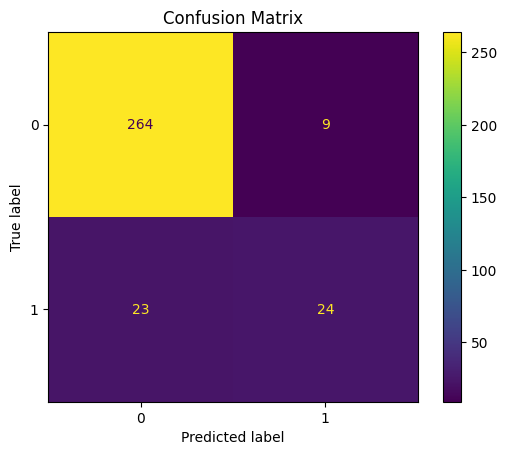

In [33]:
y_pred = rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

Cross-Validation Scores: [0.878125   0.825      0.875      0.859375   0.87460815]
Mean Cross-Validation Score: 0.8624216300940439


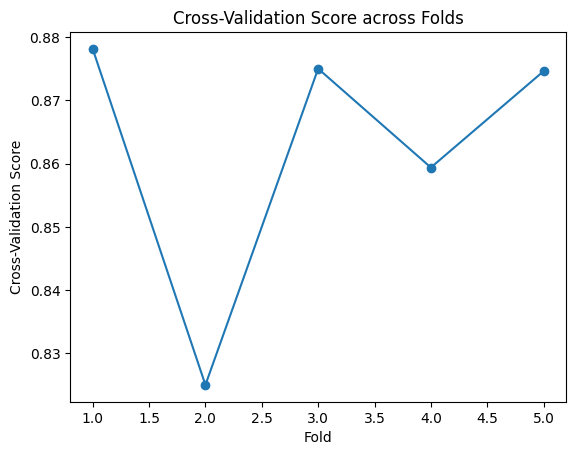

In [41]:
cv_scores = cross_val_score(rf_model, X, y, cv=5)
mean_cv_score = np.mean(cv_scores)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", mean_cv_score)

plt.figure()
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='-')
plt.xlabel("Fold")
plt.ylabel("Cross-Validation Score")
plt.title("Cross-Validation Score across Folds")
plt.show()

In [42]:
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.73      0.51      0.60        47

    accuracy                           0.90       320
   macro avg       0.82      0.74      0.77       320
weighted avg       0.89      0.90      0.89       320



In [32]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['sqrt', 'log2', None]
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)


grid_search.fit(X_train, y_train)

optimal_params = grid_search.best_params_
print("Optimal Parameters:", optimal_params)

Optimal Parameters: {'max_depth': None, 'max_features': None, 'n_estimators': 50}


In [43]:


# Building the optimized model with best parameters
optimized_rf_model = RandomForestClassifier(**optimal_params, random_state=42)
optimized_rf_model.fit(X_train, y_train)
optimized_y_pred = optimized_rf_model.predict(X_test)
optimized_classification_rep = classification_report(y_test, optimized_y_pred)
print("Optimized Model Classification Report:\n", optimized_classification_rep)


Optimized Model Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       273
           1       0.68      0.53      0.60        47

    accuracy                           0.89       320
   macro avg       0.80      0.74      0.77       320
weighted avg       0.89      0.89      0.89       320

